In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import pymoc
import glob
from time import sleep
import os


import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
import pyvo as vo
from scipy.stats import ks_2samp

In [22]:
lofar = Table.read('data/data_release/final-v0.6.fits')
fir = Table.read('data/data_release/XID+_lofar_Bootes_v0.5_20200209.fits')

In [23]:
joined = join(lofar,fir,keys='Source_Name',join_type='outer')

In [24]:
len(joined)

19179

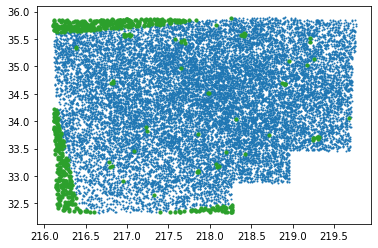

In [39]:
x = joined['RA']
y = joined['DEC']
plt.scatter(x,y,s=1)

mask = (joined['F_SPIRE_250_1'].mask) & (joined['F_SPIRE_250_2'].mask)
x = joined['RA'][mask]
y = joined['DEC'][mask]
plt.scatter(x,y,s=1)


x = tmp['RA']
y = tmp['DEC']
plt.scatter(x,y,s=10)
plt.show()

In [26]:
np.sum(mask)

0

In [28]:
mask = (np.isnan(joined['F_SPIRE_250_1'])) & (np.isnan(joined['F_SPIRE_250_2']))
np.sum(mask)

0

In [35]:
mask = np.isnan(lofar['F_SPIRE_250']) & np.isnan(lofar['F_PACS_100']) & np.isnan(lofar['F_MIPS_24'])
tmp = lofar[mask]

tmp_joined = join(tmp,fir,keys='Source_Name',join_type='inner')


In [40]:
tmp

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ALPHA_J2000,DELTA_J2000,FLAG_DEEP,flag_clean,ID_OPTICAL,ID_SPITZER,ID,FLAG_OVERLAP,EBV,FUV_flux_corr,FUV_fluxerr_corr,FUV_mag_corr,FUV_magerr_corr,NUV_flux_corr,NUV_fluxerr_corr,NUV_mag_corr,NUV_magerr_corr,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,Bw_flux_corr,Bw_fluxerr_corr,Bw_mag_corr,Bw_magerr_corr,R_flux_corr,R_fluxerr_corr,R_mag_corr,R_magerr_corr,I_flux_corr,I_fluxerr_corr,I_mag_corr,I_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,z_Subaru_flux_corr,z_Subaru_fluxerr_corr,z_Subaru_mag_corr,z_Subaru_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,H_flux_corr,H_fluxerr_corr,H_mag_corr,H_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,Ks_flux_corr,Ks_fluxerr_corr,Ks_mag_corr,Ks_magerr_corr,ch1_flux_corr,ch1_fluxerr_corr,ch1_mag_corr,ch1_magerr_corr,ch2_flux_corr,ch2_fluxerr_corr,ch2_mag_corr,ch2_magerr_corr,ch3_flux_corr,ch3_fluxerr_corr,ch3_mag_corr,ch3_magerr_corr,ch4_flux_corr,ch4_fluxerr_corr,ch4_mag_corr,ch4_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,hp_idx_11,hp_depth_cluster,tot_corr_z_Subaru,tot_corr_err_z_Subaru,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,Bw_rest,R_rest,I_rest,z_rest,z_Subaru_rest,y_rest,J_rest,H_rest,K_rest,Ks_rest,ch1_rest,ch2_rest,ch3_rest,ch4_rest,XID+_rerun_mips,XID+_rerun_pacs,XID+_rerun_SPIRE
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f